In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

import math
from SALib.sample import saltelli
from SALib.analyze import sobol


import warnings
warnings.filterwarnings("ignore")

In [2]:
dfX_raw = pd.read_csv('./features.csv',index_col=0)
dfY = pd.read_csv('./labels.csv',index_col=0)

In [3]:
scaler = MinMaxScaler( )
scaler.fit(dfX_raw)
scaler.data_max_
dfX=scaler.transform(dfX_raw)
dfX

array([[0.1815908 , 0.37118559, 0.995998  , ..., 0.07303652, 0.71685843,
        0.46373187],
       [0.64732366, 0.4072036 , 0.6198099 , ..., 0.96048024, 0.01050525,
        0.90795398],
       [0.95047524, 0.96748374, 0.31015508, ..., 0.99749875, 0.97298649,
        0.4172086 ],
       ...,
       [0.28364182, 0.17858929, 0.1885943 , ..., 0.67933967, 0.72286143,
        0.20510255],
       [0.45272636, 0.59429715, 0.33266633, ..., 0.43721861, 0.84942471,
        0.72436218],
       [0.07953977, 0.56878439, 0.03151576, ..., 0.11655828, 0.57878939,
        0.63681841]])

In [4]:
scaler = MinMaxScaler( )
scaler.fit(dfY)
scaler.data_max_
dfy=scaler.transform(dfY)
dfy

array([[0.9817669 , 0.85625751, 0.98992639, ..., 0.98362136, 0.74180602,
        0.72449331],
       [0.81193176, 0.99507821, 0.95277331, ..., 0.84586908, 1.        ,
        1.        ],
       [0.88185779, 0.96099831, 0.97033268, ..., 0.90410615, 0.89275885,
        0.89571738],
       ...,
       [0.93418505, 0.90141613, 0.97946721, ..., 0.94611361, 0.80325228,
        0.80035275],
       [0.92020028, 0.91935482, 0.97543564, ..., 0.93198669, 0.8343599 ,
        0.8298908 ],
       [0.94066634, 0.89716507, 0.97418473, ..., 0.94565693, 0.79697734,
        0.78592362]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=123)

In [6]:
X_columns = dfX_raw.columns.values[:]
x_columns = X_columns.tolist()

In [7]:
Y_columns = dfY.columns.values[:]
y_columns = Y_columns.tolist()

In [8]:
# Define the model inputs
problem = {'num_vars': 12,
           'names': x_columns,
           'bounds': [[dfX[:,0].min(), dfX[:,0].max()],
                      [dfX[:,1].min(), dfX[:,1].max()],
                      [dfX[:,2].min(), dfX[:,2].max()],
                      [dfX[:,3].min(), dfX[:,3].max()],
                      [dfX[:,4].min(), dfX[:,4].max()],
                      [dfX[:,5].min(), dfX[:,5].max()],
                      [dfX[:,6].min(), dfX[:,6].max()],
                      [dfX[:,7].min(), dfX[:,7].max()],
                      [dfX[:,8].min(), dfX[:,8].max()],
                      [dfX[:,9].min(), dfX[:,9].max()],
                      [dfX[:,10].min(), dfX[:,10].max()],
                      [dfX[:,11].min(), dfX[:,11].max()]]}
problem

{'num_vars': 12,
 'names': ['CQao',
  'Plv,0',
  'Vlv,0',
  'Vlv',
  'CQmi',
  'Pla,0',
  'Vla,0',
  'Vla',
  'Elv,s',
  'Elv,d',
  'Ela,max',
  'Ela,min'],
 'bounds': [[0.0, 1.0],
  [0.0, 1.0],
  [0.0, 0.9999999999999996],
  [0.0, 1.0],
  [0.0, 1.0],
  [0.0, 1.0],
  [0.0, 1.0],
  [0.0, 0.9999999999999996],
  [0.0, 0.9999999999999996],
  [0.0, 1.0],
  [0.0, 1.0],
  [0.0, 1.0]]}

In [9]:
# Generate samples
param_values = saltelli.sample(problem, 1000)

In [10]:
# random forest for regression

# To set those values for the parameters n_estimators and max_samples.
n_estimators = [5, 10, 20]
max_depth = [2, 4, 8]
max_samples = [10, 20, 30]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth, max_samples = max_samples)
grid_regression = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, 
                               cv = 3, scoring = 'neg_mean_squared_error')
grid_regression.fit(X_train, y_train[:,0])

# Training a Random Forest using the best value for the  n_estimators and max_samples
random_forest_reg = RandomForestRegressor(n_estimators = grid_regression.best_params_["n_estimators"],
                                          max_depth = grid_regression.best_params_["max_depth"],
                                          max_samples = grid_regression.best_params_["max_samples"])
random_forest_reg.fit(X_train, y_train[:,0])
test_predictions = random_forest_reg.predict(X_test)

# Computing the RMSE for the validation dataset
error_random_forest_reg = np.sqrt(mean_squared_error(y_test[:,0], test_predictions))
print('The RMSE on the validation data is :', error_random_forest_reg)

The RMSE on the validation data is : 0.18266964257332685


               ST   ST_conf
CQao     0.143984  0.030884
Plv,0    0.072369  0.015599
Vlv,0    0.000000  0.000000
Vlv      0.041951  0.008613
CQmi     0.113187  0.017706
Pla,0    0.000000  0.000000
Vla,0    0.066889  0.011761
Vla      0.000000  0.000000
Elv,s    0.000515  0.000069
Elv,d    0.529585  0.052401
Ela,max  0.082910  0.015792
Ela,min  0.073752  0.013406
               S1   S1_conf
CQao     0.115238  0.050128
Plv,0    0.043211  0.027266
Vlv,0    0.000000  0.000000
Vlv      0.006769  0.015129
CQmi     0.104392  0.033724
Pla,0    0.000000  0.000000
Vla,0    0.054058  0.029740
Vla      0.000000  0.000000
Elv,s    0.000315  0.001720
Elv,d    0.508601  0.075651
Ela,max  0.042571  0.027473
Ela,min  0.034795  0.022926
                          S2   S2_conf
(CQao, Plv,0)       0.028120  0.070347
(CQao, Vlv,0)      -0.002611  0.064127
(CQao, Vlv)         0.009327  0.066310
(CQao, CQmi)       -0.003148  0.065907
(CQao, Pla,0)      -0.002611  0.064127
...                      ...       ...

Text(0.5, 1.0, 'S1')

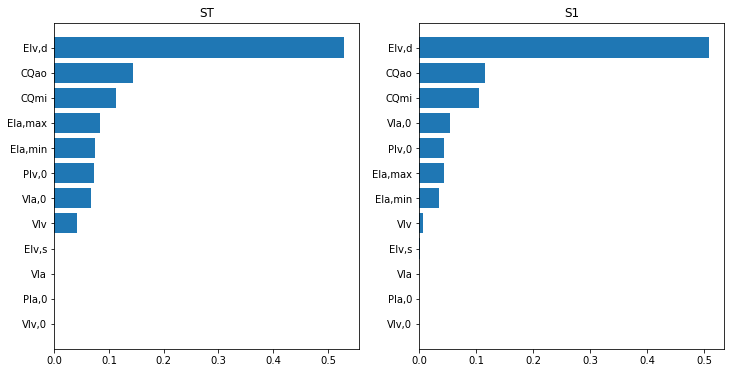

In [11]:
# Predict
Y = random_forest_reg.predict(param_values)
Si = sobol.analyze(problem, Y, print_to_console=True)
Si_df = Si.to_df()

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sorted_idx = np.argsort(Si_df[0]['ST'])
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, Si_df[0]['ST'][sorted_idx], align='center')
plt.yticks(pos, np.array(X_columns)[sorted_idx])
plt.title('ST')

plt.subplot(1, 2, 2)
sorted_idx = np.argsort(Si_df[1]['S1'])
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, Si_df[1]['S1'][sorted_idx], align='center')
plt.yticks(pos, np.array(X_columns)[sorted_idx])
plt.title('S1')


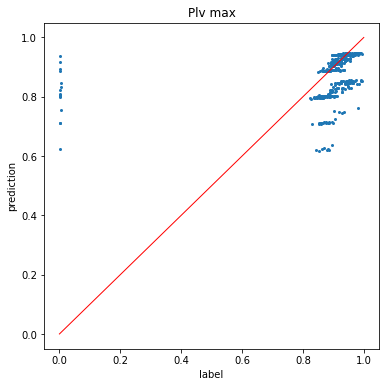

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('label')
ax.set_ylabel('prediction')
ax.set_title('Plv max')
ax.plot(y_test[:,0], test_predictions, "o", markersize=2)
x = np.linspace(0,1,50)
y = x
plt.plot(x,y, color='red', linewidth=1)



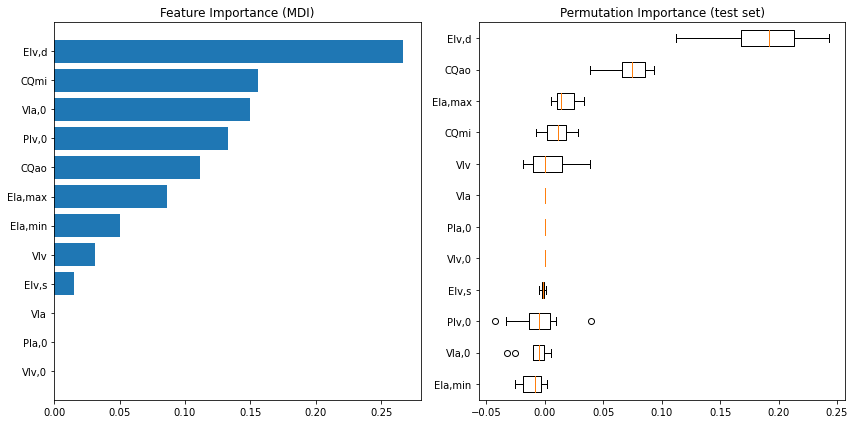

In [13]:
feature_importance = random_forest_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(random_forest_reg, X_test, y_test[:,0], n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X_columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [14]:
feature_importance

array([0.11154661, 0.13304058, 0.        , 0.03117796, 0.15574931,
       0.        , 0.14952008, 0.        , 0.01545775, 0.26703707,
       0.08610372, 0.0503669 ])

Plv max
The RMSE on the validation data is : 0.16728140825658733
               ST   ST_conf
CQao     0.682387  0.070583
Plv,0    0.009355  0.002323
Vlv,0    0.009400  0.002567
Vlv      0.011121  0.002648
CQmi     0.023568  0.004060
Pla,0    0.039534  0.005767
Vla,0    0.003784  0.001533
Vla      0.016810  0.002909
Elv,s    0.064230  0.013311
Elv,d    0.192152  0.027514
Ela,max  0.028460  0.004296
Ela,min  0.006712  0.001891
               S1   S1_conf
CQao     0.624785  0.111194
Plv,0    0.005621  0.010112
Vlv,0    0.008485  0.008288
Vlv     -0.005468  0.008051
CQmi     0.012086  0.013966
Pla,0    0.023626  0.015455
Vla,0    0.001508  0.005103
Vla      0.008183  0.013746
Elv,s    0.051645  0.019127
Elv,d    0.179946  0.041931
Ela,max  0.017838  0.016152
Ela,min  0.005636  0.005192
                          S2   S2_conf
(CQao, Plv,0)       0.019461  0.198559
(CQao, Vlv,0)       0.026170  0.197764
(CQao, Vlv)         0.036005  0.203651
(CQao, CQmi)        0.026882  0.201206
(CQao, Pla,0

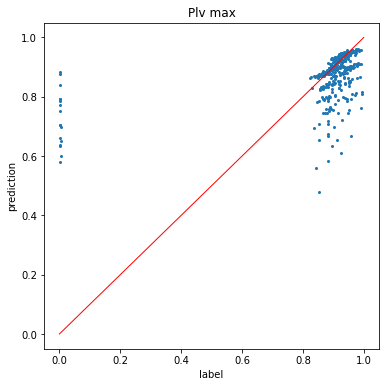

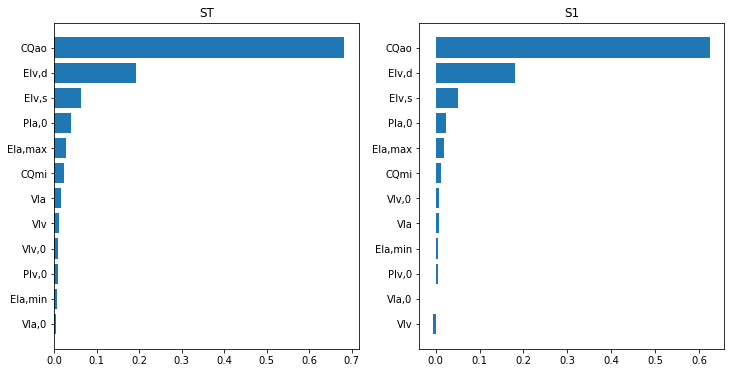

Plv min
The RMSE on the validation data is : 0.16072258206013226
               ST   ST_conf
CQao     0.626099  0.065029
Plv,0    0.027091  0.004703
Vlv,0    0.007035  0.002203
Vlv      0.059669  0.009965
CQmi     0.086359  0.015728
Pla,0    0.020116  0.003265
Vla,0    0.003727  0.001420
Vla      0.000275  0.000053
Elv,s    0.120266  0.020039
Elv,d    0.077954  0.009847
Ela,max  0.009286  0.002647
Ela,min  0.033227  0.004881
               S1   S1_conf
CQao     0.617623  0.104984
Plv,0    0.013653  0.016194
Vlv,0    0.002561  0.008738
Vlv      0.037872  0.021353
CQmi     0.064629  0.033085
Pla,0    0.011621  0.010768
Vla,0   -0.003294  0.005364
Vla      0.000342  0.001452
Elv,s    0.089810  0.032911
Elv,d    0.071871  0.023851
Ela,max  0.007157  0.005695
Ela,min  0.023614  0.016036
                          S2   S2_conf
(CQao, Plv,0)      -0.009694  0.176724
(CQao, Vlv,0)       0.000151  0.172363
(CQao, Vlv)         0.001733  0.181776
(CQao, CQmi)       -0.001608  0.188379
(CQao, Pla,0

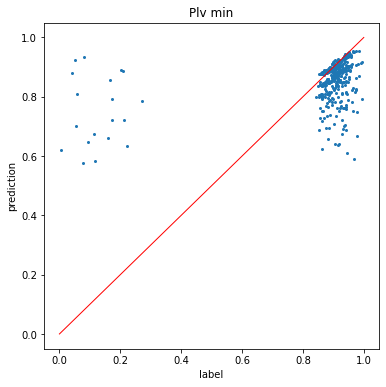

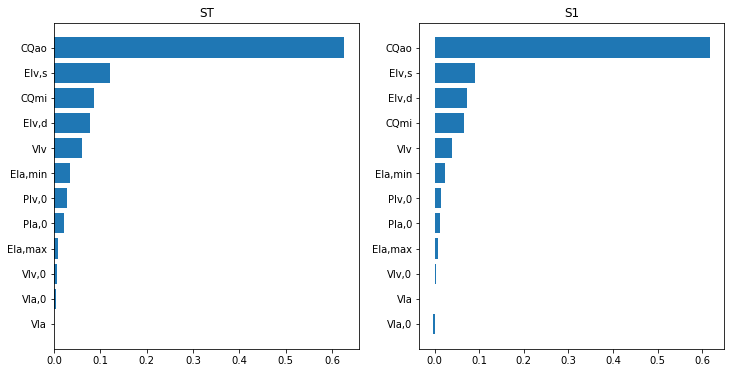

Prv max
The RMSE on the validation data is : 0.18765997999931042
               ST   ST_conf
CQao     0.400301  0.061441
Plv,0    0.005849  0.002293
Vlv,0    0.000016  0.000002
Vlv      0.008496  0.002917
CQmi     0.047304  0.012786
Pla,0    0.000027  0.000004
Vla,0    0.267970  0.049723
Vla      0.038990  0.006884
Elv,s    0.193536  0.033260
Elv,d    0.135337  0.018958
Ela,max  0.000021  0.000003
Ela,min  0.032050  0.005731
               S1   S1_conf
CQao     0.384625  0.077840
Plv,0    0.006358  0.004629
Vlv,0   -0.000035  0.000362
Vlv      0.003402  0.005212
CQmi     0.044144  0.023925
Pla,0    0.000318  0.000409
Vla,0    0.242246  0.081080
Vla      0.021901  0.019639
Elv,s    0.145428  0.047892
Elv,d    0.090009  0.032418
Ela,max -0.000015  0.000427
Ela,min  0.021145  0.016538
                          S2   S2_conf
(CQao, Plv,0)       0.007238  0.114078
(CQao, Vlv,0)       0.008389  0.114934
(CQao, Vlv)         0.004500  0.113906
(CQao, CQmi)        0.012219  0.114334
(CQao, Pla,0

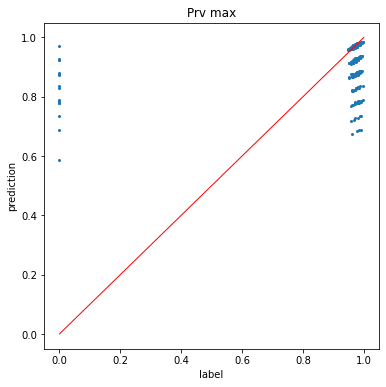

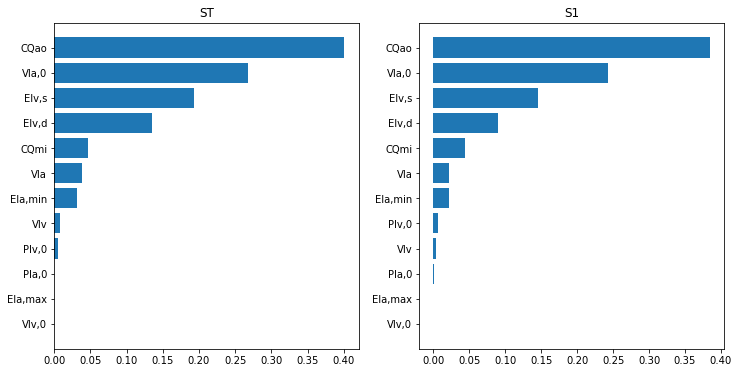

Prv min
The RMSE on the validation data is : 0.19072422188856808
               ST       ST_conf
CQao     0.827278  8.520837e-02
Plv,0    0.002969  1.516861e-03
Vlv,0    0.015022  3.398024e-03
Vlv      0.013706  3.228655e-03
CQmi     0.012656  2.625418e-03
Pla,0    0.092305  1.827808e-02
Vla,0    0.013955  3.018628e-03
Vla      0.000009  1.478313e-06
Elv,s    0.018763  3.225881e-03
Elv,d    0.005893  1.543557e-03
Ela,max  0.000006  9.586174e-07
Ela,min  0.014743  3.129687e-03
               S1   S1_conf
CQao     0.798882  0.124308
Plv,0    0.003379  0.004944
Vlv,0   -0.001162  0.012210
Vlv      0.015190  0.012049
CQmi     0.001926  0.008718
Pla,0    0.097646  0.036996
Vla,0    0.000919  0.011719
Vla      0.000068  0.000280
Elv,s    0.011647  0.011580
Elv,d    0.005313  0.008498
Ela,max  0.000078  0.000225
Ela,min  0.010278  0.010128
                          S2   S2_conf
(CQao, Plv,0)       0.003559  0.213836
(CQao, Vlv,0)       0.021584  0.212481
(CQao, Vlv)         0.000584  0.213963

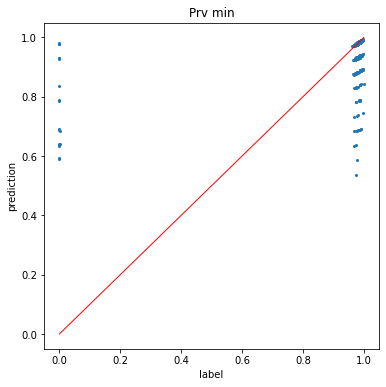

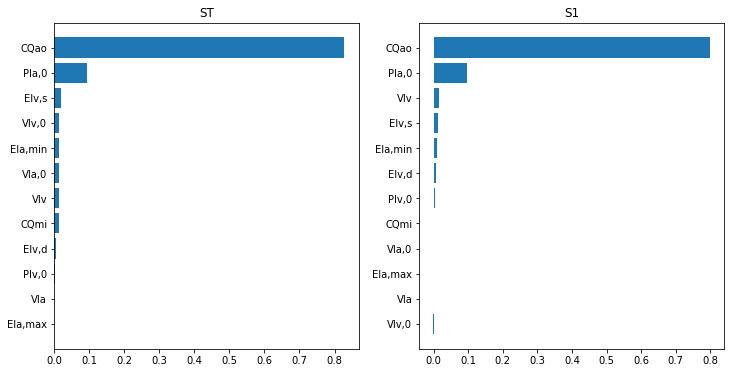

Qpo max
The RMSE on the validation data is : 0.15433108937986695
               ST   ST_conf
CQao     0.631632  0.054360
Plv,0    0.050631  0.013269
Vlv,0    0.034702  0.010468
Vlv      0.002341  0.000338
CQmi     0.046330  0.009801
Pla,0    0.072438  0.015986
Vla,0    0.027383  0.008712
Vla      0.002260  0.000394
Elv,s    0.181341  0.017529
Elv,d    0.078587  0.016029
Ela,max  0.000931  0.000189
Ela,min  0.000799  0.000129
               S1   S1_conf
CQao     0.602792  0.068104
Plv,0    0.054204  0.024462
Vlv,0    0.007606  0.019073
Vlv      0.002545  0.003933
CQmi     0.038603  0.021566
Pla,0    0.048782  0.021655
Vla,0    0.002998  0.013408
Vla     -0.001308  0.003927
Elv,s    0.127155  0.037884
Elv,d    0.059591  0.032768
Ela,max  0.000078  0.002779
Ela,min  0.001351  0.002402
                          S2   S2_conf
(CQao, Plv,0)       0.001540  0.085647
(CQao, Vlv,0)       0.004103  0.080641
(CQao, Vlv)         0.000229  0.083170
(CQao, CQmi)       -0.005363  0.084979
(CQao, Pla,0

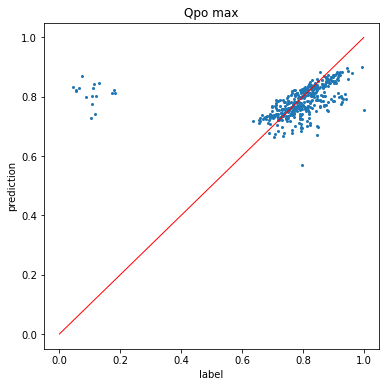

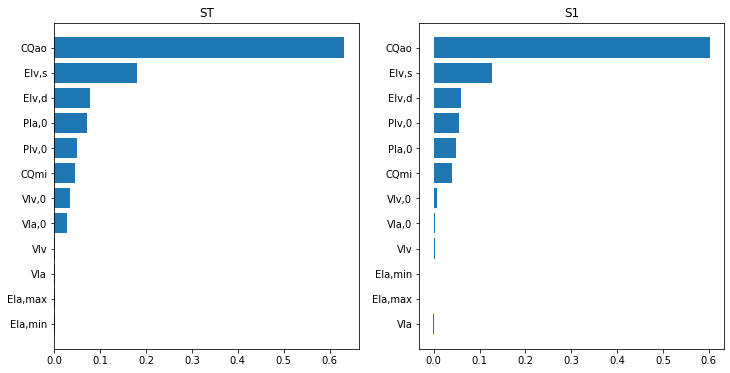

Qpo min
The RMSE on the validation data is : 0.0
         ST  ST_conf
CQao    NaN      NaN
Plv,0   NaN      NaN
Vlv,0   NaN      NaN
Vlv     NaN      NaN
CQmi    NaN      NaN
Pla,0   NaN      NaN
Vla,0   NaN      NaN
Vla     NaN      NaN
Elv,s   NaN      NaN
Elv,d   NaN      NaN
Ela,max NaN      NaN
Ela,min NaN      NaN
         S1  S1_conf
CQao    NaN      NaN
Plv,0   NaN      NaN
Vlv,0   NaN      NaN
Vlv     NaN      NaN
CQmi    NaN      NaN
Pla,0   NaN      NaN
Vla,0   NaN      NaN
Vla     NaN      NaN
Elv,s   NaN      NaN
Elv,d   NaN      NaN
Ela,max NaN      NaN
Ela,min NaN      NaN
                    S2  S2_conf
(CQao, Plv,0)      NaN      NaN
(CQao, Vlv,0)      NaN      NaN
(CQao, Vlv)        NaN      NaN
(CQao, CQmi)       NaN      NaN
(CQao, Pla,0)      NaN      NaN
...                 ..      ...
(Elv,s, Ela,max)   NaN      NaN
(Elv,s, Ela,min)   NaN      NaN
(Elv,d, Ela,max)   NaN      NaN
(Elv,d, Ela,min)   NaN      NaN
(Ela,max, Ela,min) NaN      NaN

[66 rows x 2 columns

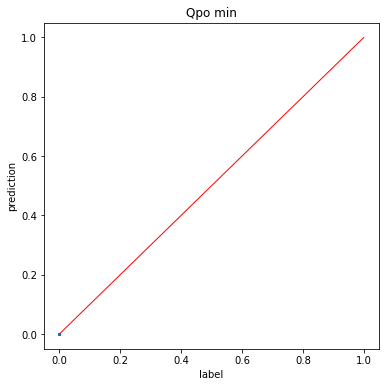

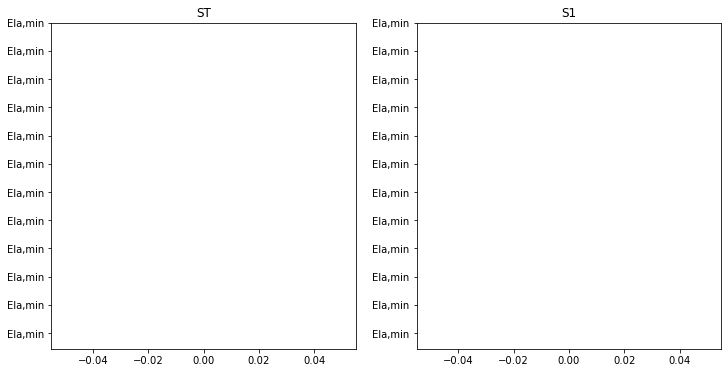

Qao max
The RMSE on the validation data is : 0.18973699086636553
               ST   ST_conf
CQao     0.190143  0.027010
Plv,0    0.345714  0.041967
Vlv,0    0.003647  0.001912
Vlv      0.000000  0.000000
CQmi     0.000000  0.000000
Pla,0    0.231971  0.028129
Vla,0    0.000038  0.000005
Vla      0.022788  0.005086
Elv,s    0.092631  0.017220
Elv,d    0.076391  0.010324
Ela,max  0.019012  0.005228
Ela,min  0.055874  0.012323
               S1   S1_conf
CQao     0.163829  0.041877
Plv,0    0.344891  0.070598
Vlv,0    0.003326  0.004459
Vlv      0.000000  0.000000
CQmi     0.000000  0.000000
Pla,0    0.215537  0.048000
Vla,0   -0.000016  0.000583
Vla      0.023409  0.016032
Elv,s    0.064187  0.027941
Elv,d    0.079987  0.024409
Ela,max  0.016533  0.013416
Ela,min  0.042205  0.019733
                          S2   S2_conf
(CQao, Plv,0)      -0.000176  0.073452
(CQao, Vlv,0)       0.002402  0.063958
(CQao, Vlv)         0.002402  0.063960
(CQao, CQmi)        0.002402  0.063960
(CQao, Pla,0

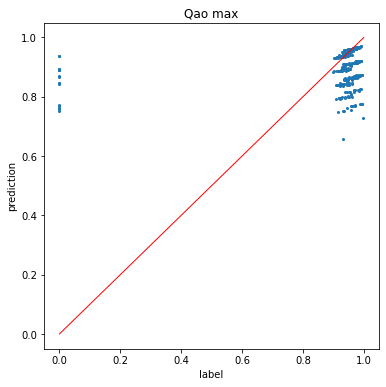

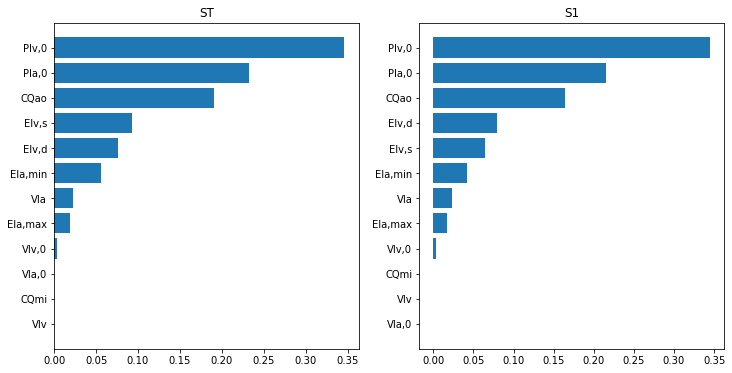

Qao min
The RMSE on the validation data is : 0.0
         ST  ST_conf
CQao    NaN      NaN
Plv,0   NaN      NaN
Vlv,0   NaN      NaN
Vlv     NaN      NaN
CQmi    NaN      NaN
Pla,0   NaN      NaN
Vla,0   NaN      NaN
Vla     NaN      NaN
Elv,s   NaN      NaN
Elv,d   NaN      NaN
Ela,max NaN      NaN
Ela,min NaN      NaN
         S1  S1_conf
CQao    NaN      NaN
Plv,0   NaN      NaN
Vlv,0   NaN      NaN
Vlv     NaN      NaN
CQmi    NaN      NaN
Pla,0   NaN      NaN
Vla,0   NaN      NaN
Vla     NaN      NaN
Elv,s   NaN      NaN
Elv,d   NaN      NaN
Ela,max NaN      NaN
Ela,min NaN      NaN
                    S2  S2_conf
(CQao, Plv,0)      NaN      NaN
(CQao, Vlv,0)      NaN      NaN
(CQao, Vlv)        NaN      NaN
(CQao, CQmi)       NaN      NaN
(CQao, Pla,0)      NaN      NaN
...                 ..      ...
(Elv,s, Ela,max)   NaN      NaN
(Elv,s, Ela,min)   NaN      NaN
(Elv,d, Ela,max)   NaN      NaN
(Elv,d, Ela,min)   NaN      NaN
(Ela,max, Ela,min) NaN      NaN

[66 rows x 2 columns

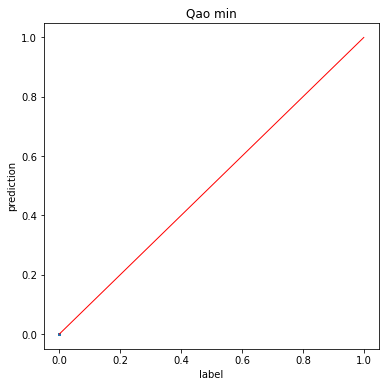

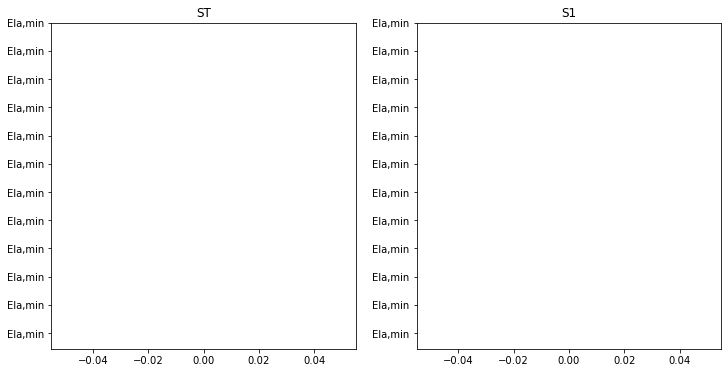

Psvn max
The RMSE on the validation data is : 0.17490591642277456
               ST   ST_conf
CQao     0.419989  0.066306
Plv,0    0.036737  0.007201
Vlv,0    0.018781  0.004449
Vlv      0.000000  0.000000
CQmi     0.015503  0.004077
Pla,0    0.000000  0.000000
Vla,0    0.000000  0.000000
Vla      0.009135  0.002923
Elv,s    0.346528  0.054967
Elv,d    0.119371  0.017631
Ela,max  0.019221  0.005249
Ela,min  0.034222  0.007203
               S1   S1_conf
CQao     0.391710  0.084118
Plv,0    0.023213  0.015315
Vlv,0    0.018119  0.012636
Vlv      0.000000  0.000000
CQmi    -0.002078  0.010185
Pla,0    0.000000  0.000000
Vla,0    0.000000  0.000000
Vla      0.010296  0.009588
Elv,s    0.340724  0.093954
Elv,d    0.120658  0.032403
Ela,max  0.024688  0.015772
Ela,min  0.032934  0.018758
                          S2   S2_conf
(CQao, Plv,0)      -0.004625  0.145259
(CQao, Vlv,0)      -0.003514  0.145297
(CQao, Vlv)        -0.013810  0.141041
(CQao, CQmi)       -0.000033  0.142426
(CQao, Pla,

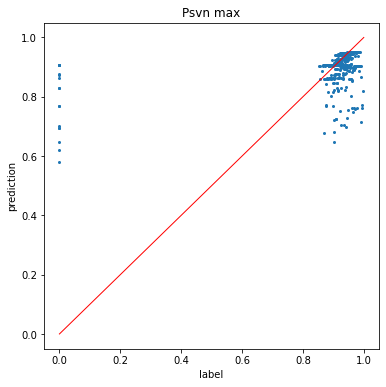

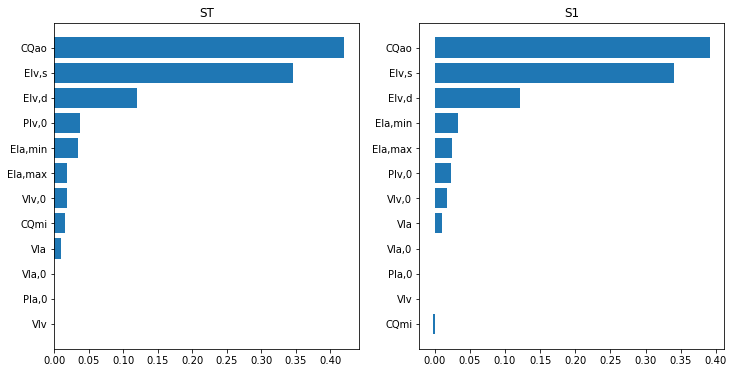

Psvn min
The RMSE on the validation data is : 0.18541961166331186
               ST   ST_conf
CQao     0.618836  0.062186
Plv,0    0.145400  0.025887
Vlv,0    0.000089  0.000017
Vlv      0.000222  0.000036
CQmi     0.000123  0.000019
Pla,0    0.148660  0.027120
Vla,0    0.000081  0.000016
Vla      0.000132  0.000023
Elv,s    0.015431  0.004086
Elv,d    0.104018  0.017906
Ela,max  0.000260  0.000044
Ela,min  0.018789  0.005449
               S1   S1_conf
CQao     0.596449  0.097970
Plv,0    0.123731  0.040819
Vlv,0    0.000429  0.000830
Vlv     -0.000304  0.001433
CQmi    -0.000532  0.000952
Pla,0    0.153365  0.044558
Vla,0   -0.000598  0.000847
Vla      0.000030  0.001100
Elv,s   -0.002624  0.010137
Elv,d    0.071669  0.031055
Ela,max  0.000383  0.001328
Ela,min  0.013766  0.010178
                          S2   S2_conf
(CQao, Plv,0)      -0.029899  0.168473
(CQao, Vlv,0)      -0.036035  0.162903
(CQao, Vlv)        -0.036892  0.162587
(CQao, CQmi)       -0.035860  0.162773
(CQao, Pla,

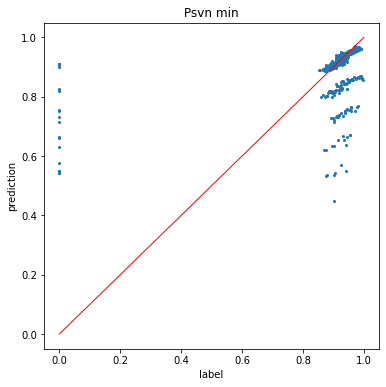

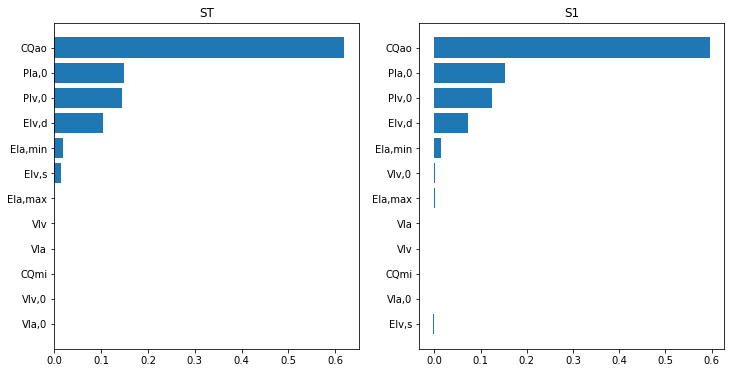

Pvn max
The RMSE on the validation data is : 0.16311764573337895
               ST   ST_conf
CQao     0.510341  0.063266
Plv,0    0.026984  0.003914
Vlv,0    0.000277  0.000049
Vlv      0.049683  0.008706
CQmi     0.015135  0.002778
Pla,0    0.023114  0.003466
Vla,0    0.013595  0.002145
Vla      0.032943  0.005988
Elv,s    0.043786  0.007246
Elv,d    0.252630  0.027936
Ela,max  0.015851  0.003174
Ela,min  0.052372  0.007656
               S1   S1_conf
CQao     0.493144  0.093465
Plv,0    0.028617  0.015651
Vlv,0   -0.000573  0.001459
Vlv      0.041962  0.023353
CQmi     0.003453  0.011783
Pla,0    0.012730  0.012782
Vla,0    0.003711  0.009936
Vla      0.039853  0.020377
Elv,s    0.014419  0.020235
Elv,d    0.253774  0.044846
Ela,max  0.018035  0.013979
Ela,min  0.023914  0.018065
                          S2   S2_conf
(CQao, Plv,0)      -0.017129  0.127089
(CQao, Vlv,0)      -0.013743  0.125750
(CQao, Vlv)         0.000200  0.128447
(CQao, CQmi)       -0.009753  0.129262
(CQao, Pla,0

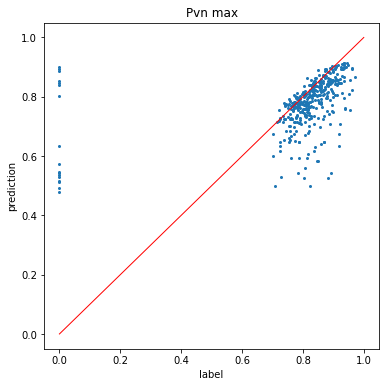

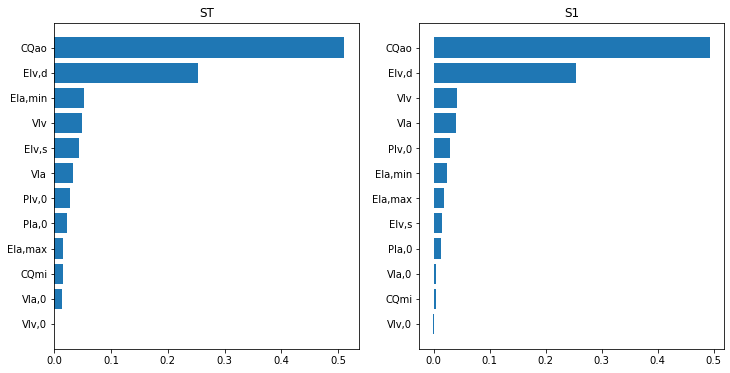

Pvn min
The RMSE on the validation data is : 0.17642163998649138
               ST   ST_conf
CQao     0.382827  0.051697
Plv,0    0.002769  0.001089
Vlv,0    0.031300  0.006068
Vlv      0.004367  0.001778
CQmi     0.036979  0.005211
Pla,0    0.112556  0.025207
Vla,0    0.032921  0.005235
Vla      0.032798  0.005339
Elv,s    0.063569  0.008609
Elv,d    0.291113  0.032562
Ela,max  0.029350  0.004658
Ela,min  0.065107  0.009331
               S1   S1_conf
CQao     0.358582  0.075437
Plv,0    0.001160  0.004762
Vlv,0    0.026656  0.016754
Vlv      0.003332  0.007848
CQmi     0.040844  0.015870
Pla,0    0.091466  0.035223
Vla,0    0.018931  0.015641
Vla      0.009497  0.014565
Elv,s    0.036360  0.022008
Elv,d    0.266590  0.055223
Ela,max  0.010220  0.013392
Ela,min  0.039017  0.021015
                          S2   S2_conf
(CQao, Plv,0)       0.031681  0.105158
(CQao, Vlv,0)       0.032789  0.107681
(CQao, Vlv)         0.027755  0.104941
(CQao, CQmi)        0.025372  0.108283
(CQao, Pla,0

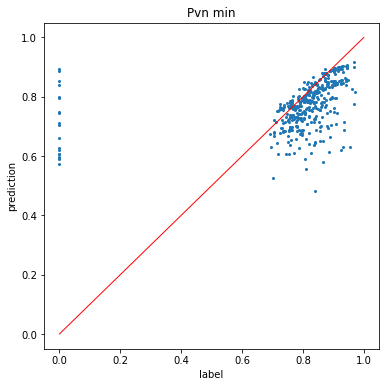

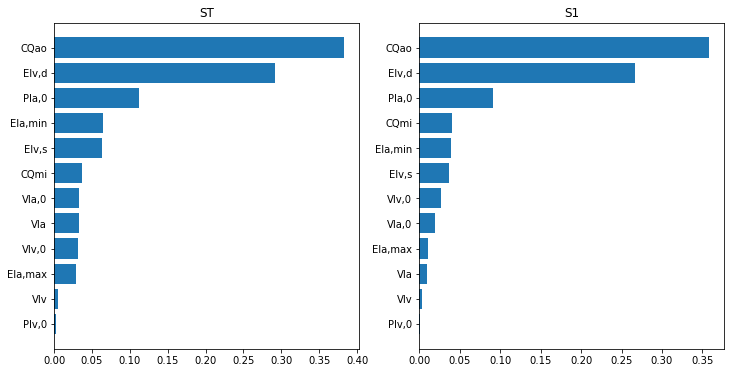

In [15]:
ST = []
S1 = []
for i in Y_columns:
    j = y_columns.index(i)
    print(i)
    
    # To set those values for the parameters n_estimators and max_samples.
    n_estimators = [5, 10, 20]
    max_depth = [2, 4, 8]
    max_samples = [10, 20, 30]

    param_grid = dict(n_estimators = n_estimators, max_depth = max_depth, max_samples = max_samples)
    grid_regression = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, 
                                   cv = 3, scoring = 'neg_mean_squared_error')
    grid_regression.fit(X_train, y_train[:,j])
#     print(grid_regression.best_params_["n_estimators"], 
#           grid_regression.best_params_["max_depth"], 
#           grid_regression.best_params_["max_samples"])
    
    # Training a Random Forest using the best value for the  n_estimators and max_samples
    random_forest_reg = RandomForestRegressor(n_estimators = grid_regression.best_params_["n_estimators"],
                                              max_depth = grid_regression.best_params_["max_depth"],
                                              max_samples = grid_regression.best_params_["max_samples"])
    random_forest_reg.fit(X_train, y_train[:,j])
    test_predictions = random_forest_reg.predict(X_test)

    # Computing the RMSE for the validation dataset
    error_random_forest_reg = np.sqrt(mean_squared_error(y_test[:,j], test_predictions))
    print('The RMSE on the validation data is :', error_random_forest_reg)
    
    fig = plt.figure(figsize=(6, 6))
    plt.xlabel('label')
    plt.ylabel('prediction')
    plt.title(i)
    plt.plot(y_test[:,j], test_predictions, "o", markersize=2)
    x = np.linspace(0,1,50)
    y = x
    plt.plot(x,y, color='red', linewidth=1)
    
    Y = random_forest_reg.predict(param_values)
    Si = sobol.analyze(problem, Y, print_to_console=True)
    Si_df = Si.to_df()

    fig = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sorted_idx = np.argsort(Si_df[0]['ST'])
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, Si_df[0]['ST'][sorted_idx], align='center')
    plt.yticks(pos, np.array(X_columns)[sorted_idx])
    plt.title('ST')

    plt.subplot(1, 2, 2)
    sorted_idx = np.argsort(Si_df[1]['S1'])
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, Si_df[1]['S1'][sorted_idx], align='center')
    plt.yticks(pos, np.array(X_columns)[sorted_idx])
    plt.title('S1')
    
    ST.append(Si_df[0]['ST'].values)
    S1.append(Si_df[1]['S1'].values)
    
    plt.show()

In [16]:
st = pd.DataFrame(ST)
st.columns = ['CQao', 'Plv,0', 'Vlv,0', 'Vlv', 'CQmi', 'Pla,0', 'Vla,0', 'Vla', 'Elv,s', 'Elv,d', 'Ela,max', 'Ela,min']

s1 = pd.DataFrame(S1)
s1.columns = ['CQao', 'Plv,0', 'Vlv,0', 'Vlv', 'CQmi', 'Pla,0', 'Vla,0', 'Vla', 'Elv,s', 'Elv,d', 'Ela,max', 'Ela,min']


In [17]:
dfST = st.drop([5,7])
dfST

,CQao,"Plv,0","Vlv,0",Vlv,CQmi,"Pla,0","Vla,0",Vla,"Elv,s","Elv,d","Ela,max","Ela,min"
0,0.682387,0.009355,0.009400,0.011121,0.023568,0.039534,0.003784,0.016810,0.064230,0.192152,0.028460,0.006712
1,0.626099,0.027091,0.007035,0.059669,0.086359,0.020116,0.003727,0.000275,0.120266,0.077954,0.009286,0.033227
2,0.400301,0.005849,0.000016,0.008496,0.047304,0.000027,0.267970,0.038990,0.193536,0.135337,0.000021,0.032050
3,0.827278,0.002969,0.015022,0.013706,0.012656,0.092305,0.013955,0.000009,0.018763,0.005893,0.000006,0.014743
4,0.631632,0.050631,0.034702,0.002341,0.046330,0.072438,0.027383,0.002260,0.181341,0.078587,0.000931,0.000799
6,0.190143,0.345714,0.003647,0.000000,0.000000,0.231971,0.000038,0.022788,0.092631,0.076391,0.019012,0.055874
8,0.419989,0.036737,0.018781,0.000000,0.015503,0.000000,0.000000,0.009135,0.346528,0.119371,0.019221,0.034222
9,0.618836,0.145400,0.000089,0.000222,0.000123,0.148660,0.000081,0.000132,0.015431,0.104018,0.000260,0.018789
10,0.510341,0.026984,0.000277,0.049683,0.015135,0.023114,0.013595,0.032943,0.043786,0.252630,0.015851,0.052372
11,0.382827,0.002769,0.031300,0.004367,0.036979,0.112556,0.032921,0.032798,0.063569,0.291113,0.029350,0.065107


In [18]:
dfS1 = s1.drop([5,7])
dfS1

,CQao,"Plv,0","Vlv,0",Vlv,CQmi,"Pla,0","Vla,0",Vla,"Elv,s","Elv,d","Ela,max","Ela,min"
0,0.624785,0.005621,0.008485,-0.005468,0.012086,0.023626,0.001508,0.008183,0.051645,0.179946,0.017838,0.005636
1,0.617623,0.013653,0.002561,0.037872,0.064629,0.011621,-0.003294,0.000342,0.089810,0.071871,0.007157,0.023614
2,0.384625,0.006358,-0.000035,0.003402,0.044144,0.000318,0.242246,0.021901,0.145428,0.090009,-0.000015,0.021145
3,0.798882,0.003379,-0.001162,0.015190,0.001926,0.097646,0.000919,0.000068,0.011647,0.005313,0.000078,0.010278
4,0.602792,0.054204,0.007606,0.002545,0.038603,0.048782,0.002998,-0.001308,0.127155,0.059591,0.000078,0.001351
6,0.163829,0.344891,0.003326,0.000000,0.000000,0.215537,-0.000016,0.023409,0.064187,0.079987,0.016533,0.042205
8,0.391710,0.023213,0.018119,0.000000,-0.002078,0.000000,0.000000,0.010296,0.340724,0.120658,0.024688,0.032934
9,0.596449,0.123731,0.000429,-0.000304,-0.000532,0.153365,-0.000598,0.000030,-0.002624,0.071669,0.000383,0.013766
10,0.493144,0.028617,-0.000573,0.041962,0.003453,0.012730,0.003711,0.039853,0.014419,0.253774,0.018035,0.023914
11,0.358582,0.001160,0.026656,0.003332,0.040844,0.091466,0.018931,0.009497,0.036360,0.266590,0.010220,0.039017


In [19]:
import seaborn as sns

[Text(0, 0.5, 'Plv max'),
 Text(0, 1.5, 'Plv min'),
 Text(0, 2.5, 'Prv max'),
 Text(0, 3.5, 'Prv min'),
 Text(0, 4.5, 'Qpo max'),
 Text(0, 5.5, 'Qao max'),
 Text(0, 6.5, 'Psvn max'),
 Text(0, 7.5, 'Psvn min'),
 Text(0, 8.5, 'Pvn max'),
 Text(0, 9.5, 'Pvn min')]

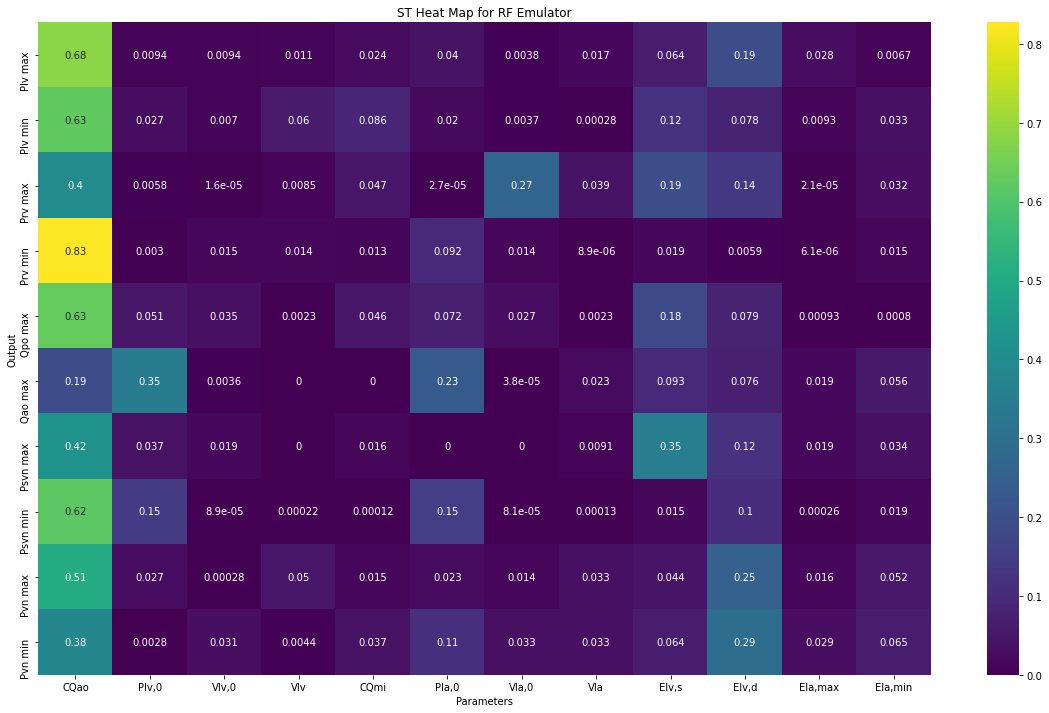

In [22]:
fig, ax1 = plt.subplots(figsize = (20,12))

sns.heatmap(dfST, cmap="viridis", annot=True)
ax1.set_title('ST Heat Map for RF Emulator')
ax1.set_xlabel('Parameters')
ax1.set_ylabel('Output')
ax1.set_yticklabels(['Plv max', 'Plv min', 'Prv max', 'Prv min', 'Qpo max', 'Qao max',
                     'Psvn max', 'Psvn min', 'Pvn max', 'Pvn min'])


[Text(0, 0.5, 'Plv max'),
 Text(0, 1.5, 'Plv min'),
 Text(0, 2.5, 'Prv max'),
 Text(0, 3.5, 'Prv min'),
 Text(0, 4.5, 'Qpo max'),
 Text(0, 5.5, 'Qao max'),
 Text(0, 6.5, 'Psvn max'),
 Text(0, 7.5, 'Psvn min'),
 Text(0, 8.5, 'Pvn max'),
 Text(0, 9.5, 'Pvn min')]

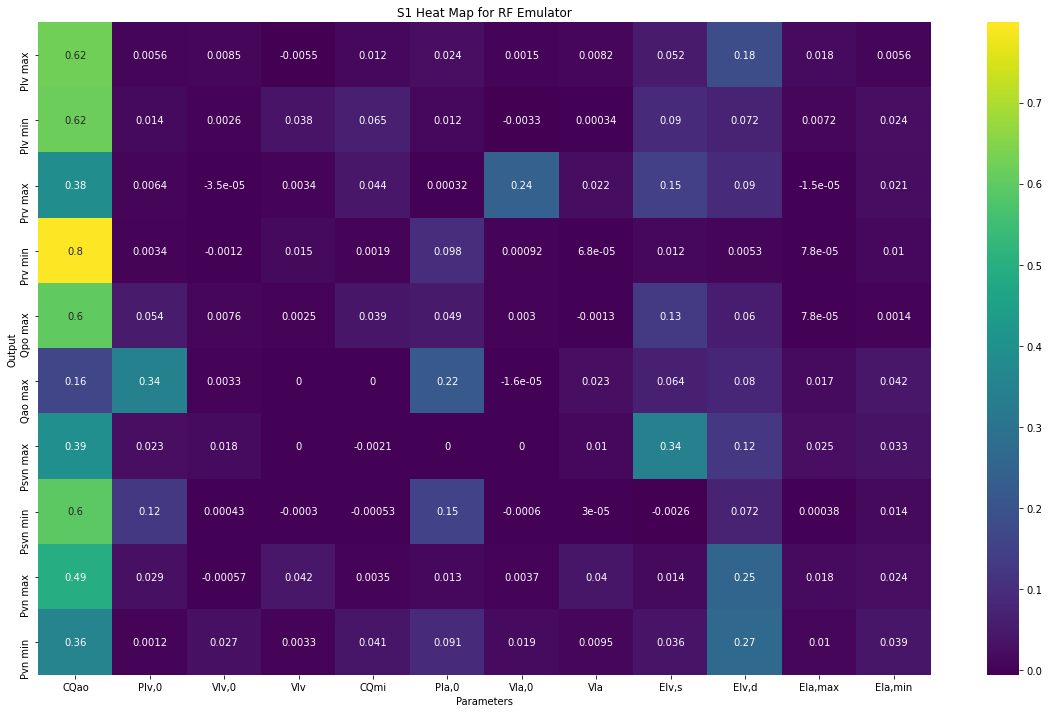

In [23]:
fig, ax = plt.subplots(figsize = (20,12))

sns.heatmap(dfS1, cmap="viridis", annot=True)
ax.set_title('S1 Heat Map for RF Emulator')
ax.set_xlabel('Parameters')
ax.set_ylabel('Output')
ax.set_yticklabels(['Plv max', 'Plv min', 'Prv max', 'Prv min', 'Qpo max', 'Qao max', 
                     'Psvn max', 'Psvn min', 'Pvn max', 'Pvn min'])
